# Step 1 : - Data Import and Library

###### pip install squarify ---- install the package.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset
online = pd.read_csv(r"C:\Users\User\Downloads\Advanced ML\RFM\data.csv", encoding = "ISO-8859-1")

In [3]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Step 2 :- Data Pre-Processing

In [4]:
online.shape

(541909, 8)

In [5]:
# Convert InvoiceDate from object to datetime format
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])  # yyyy-mm-dd
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Identify the unique customer

In [6]:
len(list(online['CustomerID'].unique()))

4373

In [7]:
print('{:,} rows; {:,} columns'
      .format(online.shape[0], online.shape[1]))

print('{:,} transactions don\'t have a customer id'
      .format(online[online.CustomerID.isnull()].shape[0]))

print('Transactions timeframe from {} to {}'.format(online['InvoiceDate'].min(),
                                    online['InvoiceDate'].max()))

541,909 rows; 8 columns
135,080 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [8]:
# Drop NA values from online
online=online.dropna()

# Step 3 : - Model Building  RFM

In [9]:
# --Group data by customerID--
# Create TotalSum column for online dataset
online['TotalSum'] = online['Quantity'] * online['UnitPrice']
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
# Create snapshot date
snapshot_date = online['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


In [11]:
# Grouping by CustomerID
data_process = online.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

In [12]:
data_process.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [13]:
# Rename the columns 
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [14]:
data_process

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [15]:
# Print top 5 rows and shape of dataframe
print(data_process.head())
print('{:,} rows; {:,} columns'.format(data_process.shape[0], data_process.shape[1]))

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0         326          2           0.00
12347.0           2        182        4310.00
12348.0          75         31        1797.24
12349.0          19         73        1757.55
12350.0         310         17         334.40
4,372 rows; 3 columns


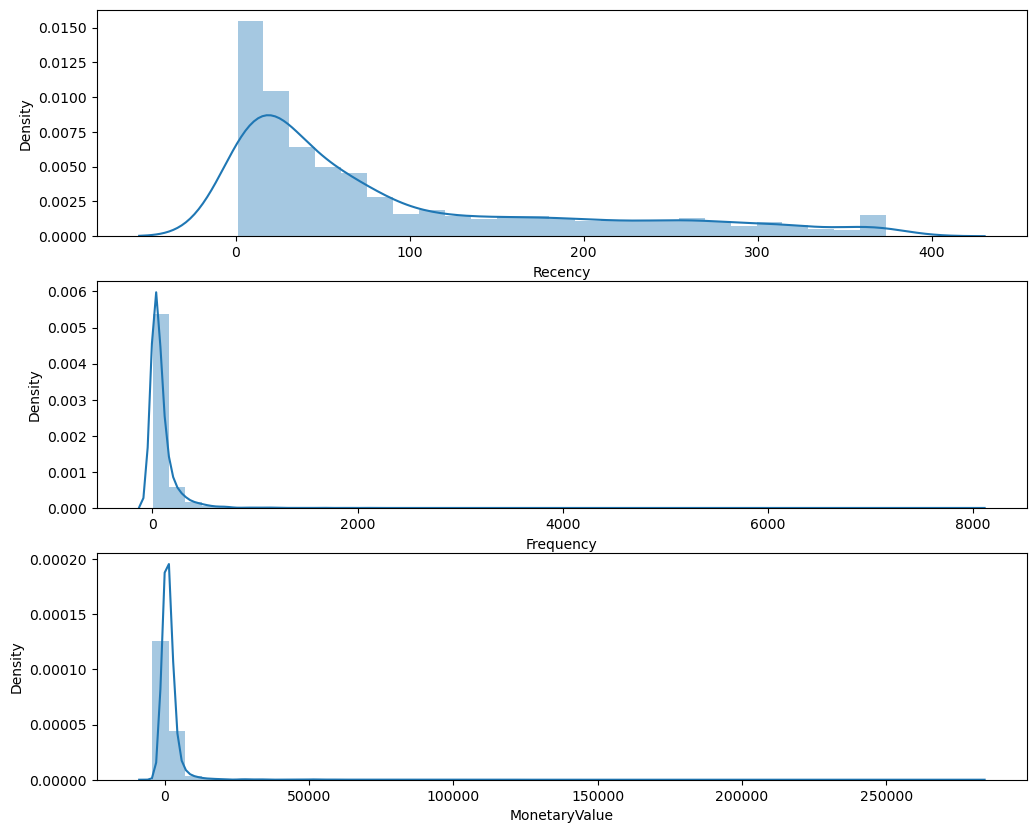

In [16]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

In [17]:
#--Calculate R and F groups--
# Create labels for Recency  
r_labels = range(4, 0, -1)  # 4 , 3 , 2 , 1 

# Create labels for Frequency

f_labels = range(1, 5)      # 1 , 2 ,3 ,4 

# Create labels for MonetaryValue
m_labels = range(1, 5)  # 1 , 2 ,3 ,4


# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)


# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)


# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)


data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


#### Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])


In [18]:
data_process['RFM_Segment_Concat'] = data_process.R.astype(str) + data_process.F.astype(str) + data_process.M.astype(str)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [19]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

62


In [20]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [21]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Loyal / Potential / Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 10)):
        return 'Champions / Promising '
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [22]:
# Create a new variable RFM_Level
rfm['Customer_Segment'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,Customer_Segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Require Activation
12347.0,2,182,4310.00,4,4,4,444,12,Loyal / Potential / Can't Loose Them
12348.0,75,31,1797.24,2,2,4,224,8,Champions / Promising
12349.0,19,73,1757.55,3,3,4,334,10,Loyal / Potential / Can't Loose Them
12350.0,310,17,334.40,1,1,2,112,4,Needs Attention


#### Extra Part

In [23]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue      
                                        mean      mean          mean count
Customer_Segment                                                          
Champions / Promising                   89.2      43.8         758.1  2310
Loyal / Potential / Can't Loose Them    19.1     232.4        5017.4  1279
Needs Attention                        174.5      13.9         227.1   391
Require Activation                     264.8       7.8         109.1   392

In [24]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_level_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count
Customer_Segment,,,,
Champions / Promising,89.2,43.8,758.1,2310
Loyal / Potential / Can't Loose Them,19.1,232.4,5017.4,1279
Needs Attention,174.5,13.9,227.1,391
Require Activation,264.8,7.8,109.1,392


In [25]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,Customer_Segment
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Require Activation
12347.0,2,182,4310.00,4,4,4,444,12,Loyal / Potential / Can't Loose Them
12348.0,75,31,1797.24,2,2,4,224,8,Champions / Promising
12349.0,19,73,1757.55,3,3,4,334,10,Loyal / Potential / Can't Loose Them
12350.0,310,17,334.40,1,1,2,112,4,Needs Attention


# Pareto Principal 

In [26]:
Pareto=pd.pivot_table(rfm,index=["Customer_Segment"],values=["MonetaryValue"],aggfunc=[np.sum,len])
Pareto

,sum,len
,MonetaryValue,MonetaryValue
Customer_Segment,,
Champions / Promising,1751211.664,2310
Loyal / Potential / Can't Loose Them,6417302.500,1279
Needs Attention,88793.800,391
Require Activation,42757.850,392


### Interpetation

* 29% ( 1279 / 4372 ) of customer give 77% profit 
* 9% ( 392 / 4372 ) of customer have not recent from last 7 month ( 265 / 365 )

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8, 6)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Loyal / Potential / Can\'t Loose Them',
                     'Champions / Promising',
                     'Needs Attention',
                     'Require Activation'] )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()